<a href="https://colab.research.google.com/github/shantasharma/dlai/blob/master/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

Loading Data into a dataframe

In [3]:
dirpathO = '/content/drive/MyDrive/intern_data/data2/O/'
dirpathS = '/content/drive/MyDrive/intern_data/data2/S/'
filesO = [os.path.join(dirpathO, fname) for fname in os.listdir(dirpathO)]
filesS = [os.path.join(dirpathS, fname) for fname in os.listdir(dirpathS)]
files = filesO + filesS

In [4]:
data = pd.DataFrame()

In [5]:
i = 0
for f in files:
    lines = np.loadtxt(f, comments="#", delimiter="\n", unpack=False)
    data[str(i)] = lines
    i = i + 1

In [6]:
data_transposed = data.T

In [33]:
Y_0 = [[1,0] for y in range(len(filesO))]
Y_1 = [[0,1] for y in range(len(filesS))]
y_labels = Y_0 + Y_1
y_labels = np.asarray(y_labels).astype('float32')

In [8]:
data_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-159.0,-176.0,-174.0,-145.0,-101.0,-45.0,0.0,29.0,15.0,15.0,29.0,34.0,9.0,-52.0,-117.0,-152.0,-143.0,-90.0,-48.0,-16.0,0.0,33.0,67.0,95.0,94.0,65.0,12.0,-49.0,-101.0,-146.0,-168.0,-162.0,-145.0,-103.0,-36.0,51.0,122.0,171.0,190.0,159.0,...,28.0,87.0,142.0,195.0,196.0,161.0,93.0,27.0,-30.0,-95.0,-146.0,-188.0,-196.0,-173.0,-128.0,-85.0,-59.0,-35.0,-18.0,-11.0,-3.0,-1.0,-15.0,-42.0,-66.0,-74.0,-66.0,-56.0,-40.0,-25.0,14.0,56.0,73.0,48.0,-12.0,-62.0,-100.0,-108.0,-97.0,-110.0
1,18.0,14.0,13.0,9.0,-6.0,-20.0,-31.0,-27.0,-10.0,5.0,8.0,16.0,33.0,47.0,39.0,6.0,-35.0,-75.0,-83.0,-70.0,-55.0,-50.0,-55.0,-55.0,-57.0,-42.0,-14.0,15.0,39.0,60.0,72.0,56.0,24.0,-12.0,-34.0,-46.0,-49.0,-45.0,-47.0,-36.0,...,2.0,-6.0,-9.0,-8.0,11.0,42.0,55.0,43.0,3.0,-38.0,-53.0,-30.0,-10.0,-10.0,-21.0,-18.0,7.0,48.0,90.0,113.0,109.0,77.0,32.0,-4.0,-28.0,-18.0,-13.0,-14.0,-17.0,-3.0,9.0,25.0,49.0,63.0,82.0,96.0,102.0,65.0,7.0,45.0
2,-69.0,-80.0,-81.0,-77.0,-59.0,-31.0,-7.0,19.0,19.0,0.0,-31.0,-58.0,-72.0,-70.0,-53.0,-45.0,-65.0,-89.0,-103.0,-106.0,-105.0,-101.0,-98.0,-89.0,-69.0,-37.0,-24.0,-20.0,-19.0,-11.0,10.0,29.0,36.0,8.0,-28.0,-51.0,-62.0,-73.0,-84.0,-91.0,...,-89.0,-66.0,-44.0,-18.0,-6.0,-5.0,-1.0,15.0,19.0,5.0,-35.0,-80.0,-124.0,-151.0,-161.0,-154.0,-123.0,-62.0,6.0,52.0,80.0,85.0,71.0,46.0,-2.0,-64.0,-119.0,-136.0,-135.0,-111.0,-76.0,-33.0,4.0,24.0,40.0,44.0,47.0,46.0,38.0,-43.0
3,29.0,20.0,-8.0,-39.0,-74.0,-97.0,-103.0,-95.0,-68.0,-41.0,-9.0,23.0,50.0,66.0,81.0,90.0,73.0,22.0,-45.0,-111.0,-161.0,-189.0,-187.0,-168.0,-131.0,-68.0,2.0,67.0,121.0,157.0,174.0,183.0,183.0,165.0,111.0,34.0,-55.0,-135.0,-192.0,-209.0,...,-70.0,-36.0,-9.0,10.0,12.0,-9.0,-46.0,-72.0,-79.0,-67.0,-49.0,-26.0,-19.0,-29.0,-41.0,-64.0,-76.0,-66.0,-30.0,-3.0,-10.0,-30.0,-53.0,-63.0,-55.0,-60.0,-73.0,-93.0,-87.0,-66.0,-28.0,16.0,53.0,66.0,68.0,71.0,64.0,55.0,33.0,-73.0
4,142.0,142.0,138.0,143.0,130.0,93.0,36.0,-27.0,-72.0,-83.0,-57.0,-28.0,-11.0,-6.0,-18.0,-23.0,-3.0,33.0,71.0,93.0,81.0,36.0,-28.0,-79.0,-110.0,-117.0,-101.0,-56.0,-12.0,27.0,54.0,75.0,108.0,146.0,167.0,150.0,95.0,34.0,-30.0,-78.0,...,157.0,214.0,240.0,216.0,180.0,157.0,126.0,80.0,5.0,-74.0,-130.0,-157.0,-150.0,-127.0,-79.0,-16.0,68.0,146.0,233.0,311.0,348.0,325.0,242.0,121.0,-13.0,-110.0,-163.0,-174.0,-155.0,-113.0,-61.0,-34.0,-8.0,13.0,40.0,67.0,92.0,95.0,66.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,67.0,114.0,148.0,158.0,161.0,147.0,119.0,68.0,8.0,-42.0,-79.0,-106.0,-104.0,-98.0,-93.0,-93.0,-108.0,-126.0,-142.0,-143.0,-127.0,-99.0,-69.0,-40.0,-25.0,-20.0,-17.0,-24.0,-37.0,-53.0,...,-2.0,-25.0,-50.0,-64.0,-76.0,-77.0,-87.0,-101.0,-119.0,-146.0,-170.0,-193.0,-206.0,-209.0,-201.0,-185.0,-169.0,-164.0,-155.0,-144.0,-134.0,-135.0,-155.0,-185.0,-220.0,-221.0,-181.0,-115.0,-43.0,8.0,32.0,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0
172,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,-151.0,-61.0,10.0,74.0,149.0,213.0,262.0,291.0,306.0,311.0,326.0,359.0,399.0,407.0,391.0,332.0,223.0,96.0,-84.0,-305.0,-509.0,-667.0,-709.0,-660.0,-536.0,-392.0,-247.0,-134.0,-61.0,19.0,...,679.0,575.0,412.0,117.0,-275.0,-672.0,-957.0,-1044.0,-997.0,-877.0,-719.0,-544.0,-374.0,-245.0,-157.0,-94.0,-26.0,39.0,119.0,181.0,237.0,278.0,315.0,342.0,366.0,385.0,399.0,409.0,415.0,428.0,463.0,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0
173,-438.0,-561.0,-62

In [9]:
features = np.array(data_transposed)

In [34]:
X_train,X_test, Y_train, Y_test =  train_test_split(features, y_labels, test_size =0.20, random_state= 4 )

In [35]:
normalize = preprocessing.Normalization()
normalize.adapt(features)

def get_compiled_model():
    model = tf.keras.Sequential([
        normalize,                        
        tf.keras.layers.Dense(256, activation='relu', input_shape=(4097,)),
        tf.keras.layers.Dense(32, activation='relu', input_shape=(256,)),
        tf.keras.layers.Dense(2, activation = 'softmax', input_shape=(32,))
      ])
    model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                    metrics=['accuracy'])
    return model
        

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4097)              8195      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1049088   
_________________________________________________________________
dense_11 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 1,065,573
Trainable params: 1,057,378
Non-trainable params: 8,195
_________________________________________________________________


In [36]:
model = get_compiled_model()
history = model.fit(X_train,Y_train, epochs = 15, validation_data=(X_test, Y_test))

Epoch 1/15
5/5 [==============================] - 1s 56ms/step - loss: 0.9412 - accuracy: 0.5424 - val_loss: 0.6022 - val_accuracy: 0.8056
Epoch 2/15
5/5 [==============================] - 0s 59ms/step - loss: 0.2064 - accuracy: 0.9909 - val_loss: 0.5320 - val_accuracy: 0.8333
Epoch 3/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0798 - accuracy: 0.9868 - val_loss: 0.5280 - val_accuracy: 0.8333
Epoch 4/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.5630 - val_accuracy: 0.8889
Epoch 5/15
5/5 [==============================] - 0s 18ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.6152 - val_accuracy: 0.8889
Epoch 6/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.6655 - val_accuracy: 0.8889
Epoch 7/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.7119 - val_accuracy: 0.8889
Epoch 8/15
5/5 [===========

Analysis

Text(0.5, 1.0, 'Traning Vs Validation Accuracy')

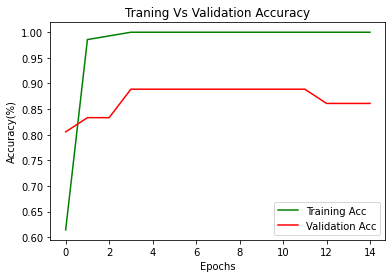

In [37]:
plt.plot(history.history['accuracy'], 'g')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy(%)")
plt.title('Traning Vs Validation Accuracy')

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
import itertools

y_test = []
prediction = model.predict(X_test)

for i in prediction:
  if i[0] > i[1]:
    y_test.append(0)
  else:
    y_test.append(1)


y_true = []
for i in Y_test:
  if i[0] > i[1]:
    y_true.append(0)
  else:
    y_true.append(1)



cm = confusion_matrix(y_true = y_true, y_pred = y_test)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[17  0]
 [ 5 14]]


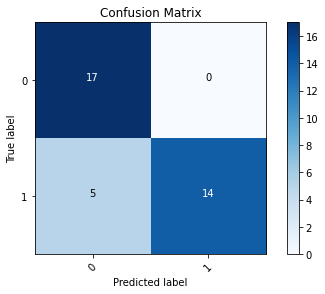

In [46]:
plot_confusion_matrix(cm=cm, classes= [0, 1], title='Confusion Matrix')